In [79]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [80]:
# Code starts here
data=pd.read_csv('train.csv')
data.head(5)

,Id,TITLE,CATEGORY
0,50846,Ukraine to get $18 billion rescue from IMF,b
1,234375,McDonald's Abandons Headquarters to Avoid Prot...,b
2,63422,New study finds evidence that Autism begins in...,m
3,353942,Prime Minister Modi Says Meeting With Facebook...,t
4,311586,New robot guides at Tokyo museum almost outper...,t


In [81]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337935 entries, 0 to 337934
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        337935 non-null  int64 
 1   TITLE     337935 non-null  object
 2   CATEGORY  337935 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.7+ MB
None
(337935, 3)


In [82]:
print(data['TITLE'].nunique())
print(data['CATEGORY'].nunique())

327275
4


In [83]:
data

,Id,TITLE,CATEGORY
0,50846,Ukraine to get $18 billion rescue from IMF,b
1,234375,McDonald's Abandons Headquarters to Avoid Prot...,b
2,63422,New study finds evidence that Autism begins in...,m
3,353942,Prime Minister Modi Says Meeting With Facebook...,t
4,311586,New robot guides at Tokyo museum almost outper...,t
...,...,...,...
337930,266858,EPA: Washington must cut emissions by 72 percent,b
337931,239572,Tupac's dying words revealed,e
337932,303331,Universal: New Harry Potter area opens in July,e
337933,379593,Yahoo Revenue Declines Again; Marissa Mayer Is...,t


### Visualize and Preprocess the data

### Retaining only alphabets (Using regular expressions)

In [84]:
data['TITLE']=data['TITLE'].str.replace('[^a-zA-Z]', ' ')
data

<ipython-input-84-28808a0e31c9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['TITLE']=data['TITLE'].str.replace('[^a-zA-Z]', ' ')


,Id,TITLE,CATEGORY
0,50846,Ukraine to get billion rescue from IMF,b
1,234375,McDonald s Abandons Headquarters to Avoid Prot...,b
2,63422,New study finds evidence that Autism begins in...,m
3,353942,Prime Minister Modi Says Meeting With Facebook...,t
4,311586,New robot guides at Tokyo museum almost outper...,t
...,...,...,...
337930,266858,EPA Washington must cut emissions by percent,b
337931,239572,Tupac s dying words revealed,e
337932,303331,Universal New Harry Potter area opens in July,e
337933,379593,Yahoo Revenue Declines Again Marissa Mayer Is...,t


In [85]:
#data['TITLE']=data['TITLE'].str.replace('[^a-zA-Z]', ' ').str.lower().str.split('\s+')

In [86]:
'''''
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

pos_tweets = [('I love this car', 'positive'),
    ('This view is amazing', 'positive'),
    ('I feel great this morning', 'positive'),
    ('I am so excited about the concert', 'positive'),
    ('He is my best friend', 'positive')]

test = pd.DataFrame(pos_tweets)
test.columns = ["tweet","class"]
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['tweet_without_stopwords'] = test['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test
''''

SyntaxError: EOL while scanning string literal (<ipython-input-86-eea9cc7cabf5>, line 17)

### Removing stopwords (Using nltk library)

In [87]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [88]:
data['TITLE_without_stopword'] = data['TITLE'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data

,Id,TITLE,CATEGORY,TITLE_without_stopword
0,50846,Ukraine to get billion rescue from IMF,b,Ukraine get billion rescue IMF
1,234375,McDonald s Abandons Headquarters to Avoid Prot...,b,McDonald Abandons Headquarters Avoid Protesters
2,63422,New study finds evidence that Autism begins in...,m,New study finds evidence Autism begins womb
3,353942,Prime Minister Modi Says Meeting With Facebook...,t,Prime Minister Modi Says Meeting With Facebook...
4,311586,New robot guides at Tokyo museum almost outper...,t,New robot guides Tokyo museum almost outperfor...
...,...,...,...,...
337930,266858,EPA Washington must cut emissions by percent,b,EPA Washington must cut emissions percent
337931,239572,Tupac s dying words revealed,e,Tupac dying words revealed
337932,303331,Universal New Harry Potter area opens in July,e,Universal New Harry Potter area opens July
337933,379593,Yahoo Revenue Declines Again Marissa Mayer Is...,t,Yahoo Revenue Declines Again Marissa Mayer Is ...


In [121]:
df=data[['TITLE_without_stopword', 'CATEGORY']]
df.columns=["X","y"]
df=df.head(500)
df

,X,y
0,Ukraine get billion rescue IMF,b
1,McDonald Abandons Headquarters Avoid Protesters,b
2,New study finds evidence Autism begins womb,m
3,Prime Minister Modi Says Meeting With Facebook...,t
4,New robot guides Tokyo museum almost outperfor...,t
...,...,...
495,TweetDeck Was Hacked And This Tweet Is Getting...,t
496,Frigoglass offers innovative limited edition F...,b
497,Supreme Court declines block drug ruling paten...,b
498,Fist bump instead handshake handshake instead ...,m


### Model building

- Now let's come to the actual task, using any classifier, predict the `CATEGORY`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [122]:
# Code starts here

In [123]:
cv = CountVectorizer()
cv.fit(df["X"])
vector = cv.transform(df["X"])
X = vector.toarray()

X.shape

(500, 2197)

In [124]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [125]:
labels=df[["y"]]
le=LabelEncoder()
labels['y']=le.fit_transform(labels['y'])

<ipython-input-125-09f285a604a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['y']=le.fit_transform(labels['y'])


<AxesSubplot:>

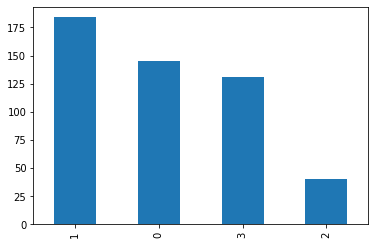

In [131]:
labels['y'].value_counts().plot(kind='bar')

In [126]:
X_train, X_test, y_train, y_test=train_test_split(X, labels["y"], test_size = 0.4, random_state = 42)

In [127]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
acc = log_reg.score(X_test,y_test)
acc

0.675

In [128]:
tfidf=TfidfVectorizer()
vector_tfidf=tfidf.fit_transform(df["X"])
X_tfidf=vector_tfidf.toarray()


X_train, X_test, y_train, y_test=train_test_split(X_tfidf, labels["y"], test_size = 0.4, random_state = 42)

In [129]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
tfidf_acc = log_reg.score(X_test,y_test)
tfidf_acc

0.62

In [130]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

nb_acc = nb.score(X_test,y_test)
nb_acc

0.625

In [133]:
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC())
clf.fit(X_train,y_train)
clf_acc = clf.score(X_test,y_test)
clf_acc

0.635

In [135]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
ros=RandomOverSampler(random_state=0)
X_ros, y_ros=ros.fit_resample(X_train, y_train)

nb=MultinomialNB()
nb.fit(X_ros, y_ros)
ros_score = nb.score(X_test,y_test)
ros_score

0.65

In [137]:
svc=SVC(random_state=0, kernel="linear")
svc.fit(X_ros , y_ros)
svc_score=svc.score(X_ros , y_ros)
print(svc_score)

1.0


In [ ]:
# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [ ]:
# Code Starts here
# Prediction on test data





































# Code ends here